# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
def buildURL(cityName):
    return 'https://api.openweathermap.org/data/2.5/weather?q=' + cityName + '&units=metric&appid=' + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = buildURL(city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | balaklava
Processing Record 2 of Set 1 | inhambane
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | hamilton
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | pimentel
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | anan
Processing Record 14 of Set 1 | arilje
Processing Record 15 of Set 1 | manacapuru
Processing Record 16 of Set 1 | lata
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | colonia
Processing Record 19 of Set 1 | lompoc
Processing Record 20 of Set 1 | vorkuta
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | qaqortoq
Processing Record 23 of Set 1 | puerto ayora
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,balaklava,44.5000,33.6000,17.01,62,0,2.71,UA,1698700263
1,inhambane,-23.8650,35.3833,19.58,70,65,4.65,MZ,1698700185
2,invercargill,-46.4000,168.3500,10.57,91,99,1.34,NZ,1698700142
3,hermanus,-34.4187,19.2345,13.83,78,0,7.26,ZA,1698700264
4,hamilton,39.1834,-84.5333,7.92,84,100,5.14,US,1698699678


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,balaklava,44.5000,33.6000,17.01,62,0,2.71,UA,1698700263
1,inhambane,-23.8650,35.3833,19.58,70,65,4.65,MZ,1698700185
2,invercargill,-46.4000,168.3500,10.57,91,99,1.34,NZ,1698700142
3,hermanus,-34.4187,19.2345,13.83,78,0,7.26,ZA,1698700264
4,hamilton,39.1834,-84.5333,7.92,84,100,5.14,US,1698699678


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

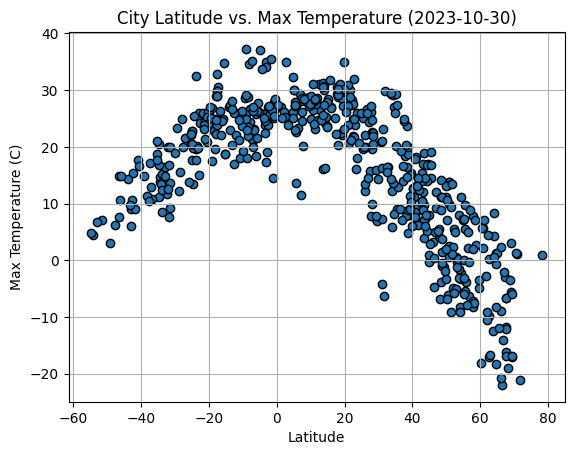

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,3],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-10-30)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

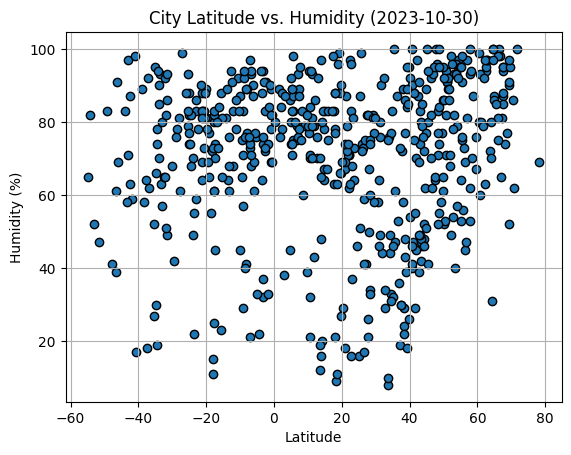

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,4],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-10-30)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

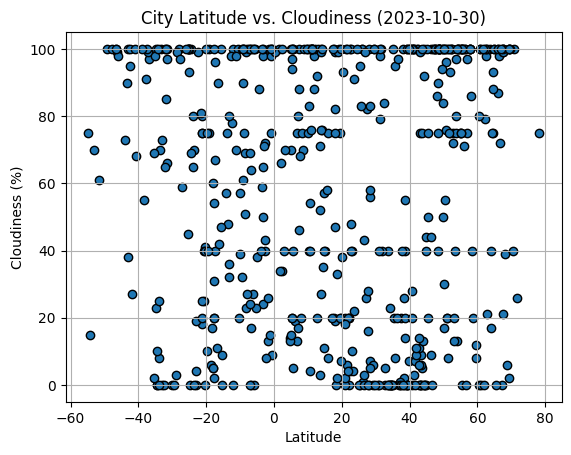

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,5],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-10-30)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

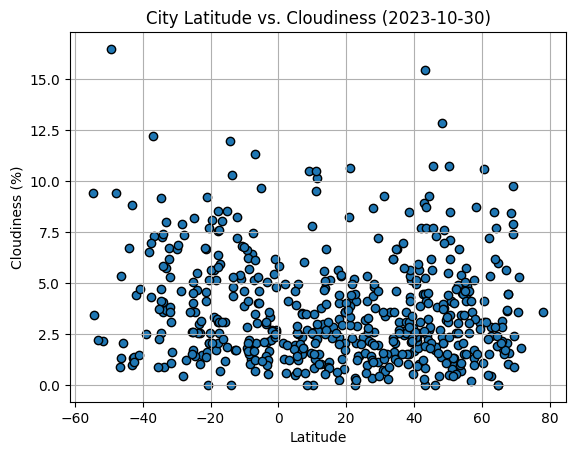

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,6],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-10-30)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linRegressPlot(x_values,y_values,x_label,y_label,x_eqPoint,y_eqPoint):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_eqPoint,y_eqPoint),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)    
    print(f'The r-value is: {rvalue}')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,balaklava,44.5000,33.6000,17.01,62,0,2.71,UA,1698700263
4,hamilton,39.1834,-84.5333,7.92,84,100,5.14,US,1698699678
6,yellowknife,62.4560,-114.3525,0.23,94,98,5.36,CA,1698700138
7,kodiak,57.7900,-152.4072,7.73,93,100,5.14,US,1698700267
9,albany,42.6001,-73.9662,8.82,87,100,4.45,US,1698700112


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,inhambane,-23.8650,35.3833,19.58,70,65,4.65,MZ,1698700185
2,invercargill,-46.4000,168.3500,10.57,91,99,1.34,NZ,1698700142
3,hermanus,-34.4187,19.2345,13.83,78,0,7.26,ZA,1698700264
5,pisco,-13.7000,-76.2167,23.03,64,48,10.29,PE,1698700237
8,grytviken,-54.2811,-36.5092,4.54,82,15,3.42,GS,1698700268


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8625020755652013


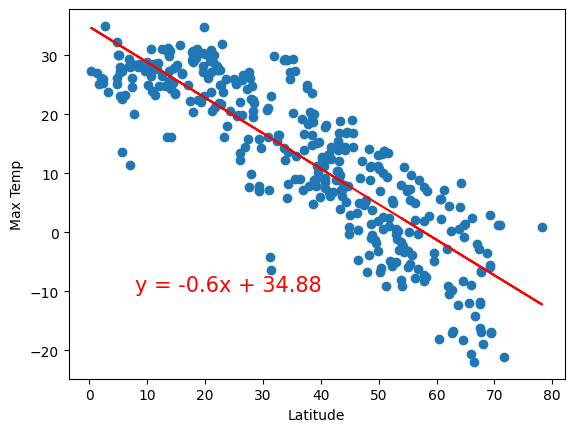

In [15]:
# Linear regression on Northern Hemisphere
linRegressPlot(northern_hemi_df.iloc[:,1],northern_hemi_df.iloc[:,3],"Latitude","Max Temp",8,-10)

The r-value is: 0.7617736127063355


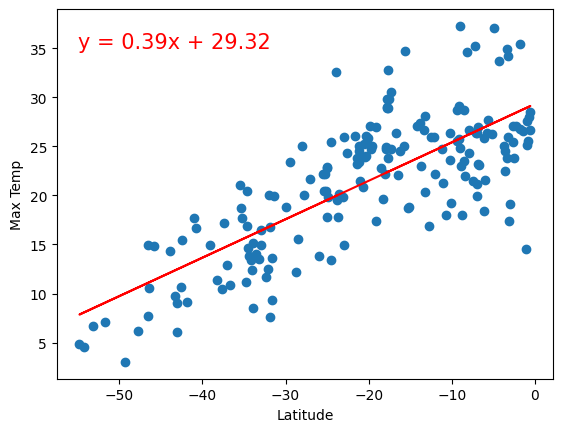

In [16]:
# Linear regression on Southern Hemisphere
linRegressPlot(southern_hemi_df.iloc[:,1],southern_hemi_df.iloc[:,3],"Latitude","Max Temp",-55,35)

**Discussion about the linear relationship:** There's clearly a pretty strong correlation between latitude and max temperature: max temperatures increase closer to the equator. The correlation seems to be stronger in the northern hemisphere, but that could be a result of more data points (cities) and specifically more inland data points in the northern hemisphere as oceans are known to have an impact on coastal weather.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1712960191616363


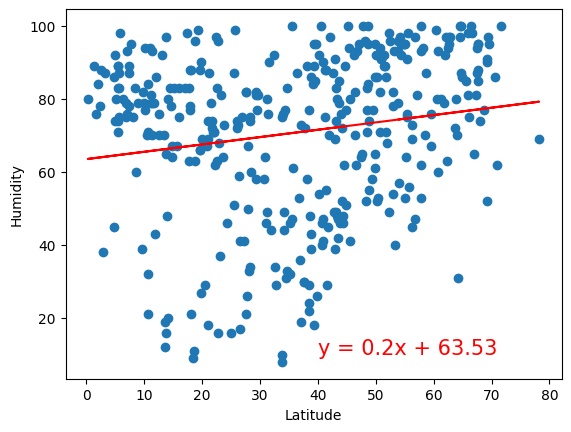

In [17]:
# Northern Hemisphere
linRegressPlot(northern_hemi_df.iloc[:,1],northern_hemi_df.iloc[:,4],"Latitude","Humidity",40,10)

The r-value is: 0.09832472598339864


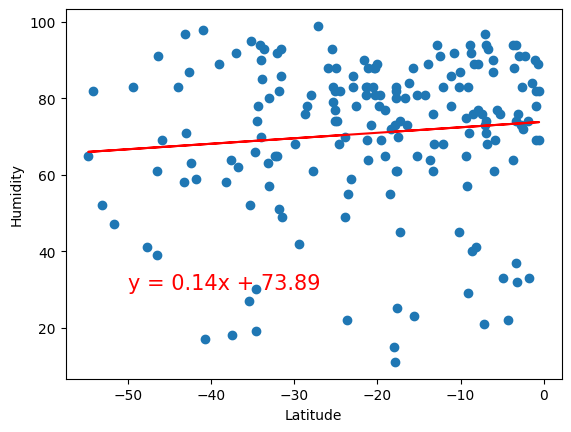

In [18]:
# Southern Hemisphere
linRegressPlot(southern_hemi_df.iloc[:,1],southern_hemi_df.iloc[:,4],"Latitude","Humidity",-50,30)

**Discussion about the linear relationship:** The plots suggest there is little correlation between humidity and latitude. The correlation seems to be a bit higher in the northern hemisphere, and even seems to suggest an increase in humidity as you get further from the equator, whereas the tiny correlation that exists for the southern hemisphere shows an increase as your approach the equator. Together, these support the argument that latitude has little to no impact on humidity, at least not the current humidity. A more meaningful comparison would be average humidity to negate the difference that the current time and/or season will have on these measurements.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1151179937549198


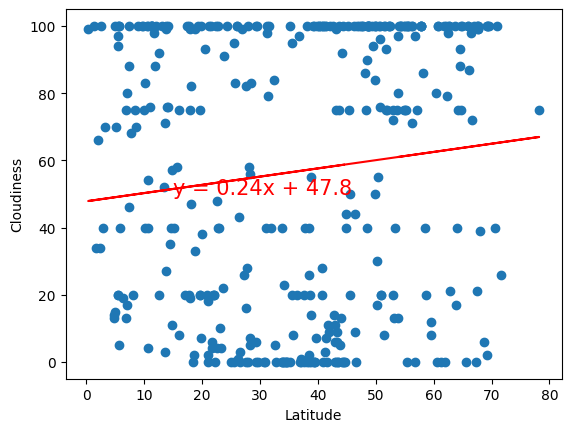

In [19]:
# Northern Hemisphere
linRegressPlot(northern_hemi_df.iloc[:,1],northern_hemi_df.iloc[:,5],"Latitude","Cloudiness",15,50)

The r-value is: -0.09897822188576597


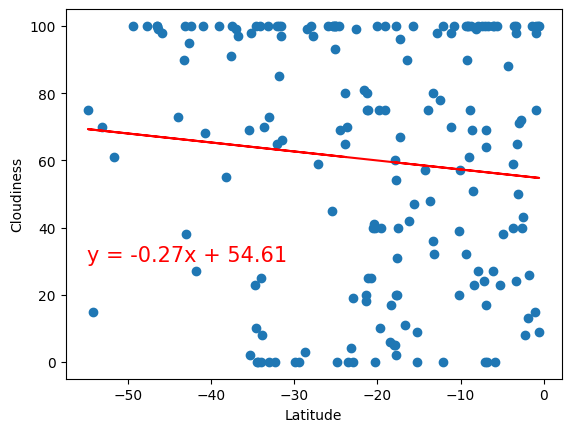

In [20]:
# Southern Hemisphere
linRegressPlot(southern_hemi_df.iloc[:,1],southern_hemi_df.iloc[:,5],"Latitude","Cloudiness",-55,30)

**Discussion about the linear relationship:** There is very little correlation between cloudiness and latitude in either hemisphere according to our data. Again, average cloudiness would be a better thing to analyze.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10809086910468947


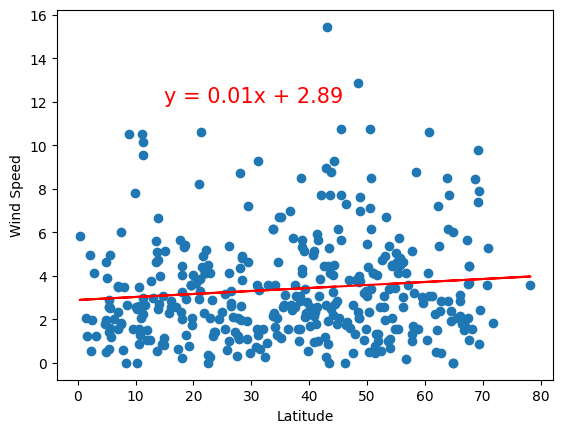

In [21]:
# Northern Hemisphere
linRegressPlot(northern_hemi_df.iloc[:,1],northern_hemi_df.iloc[:,6],"Latitude","Wind Speed",15,12)

The r-value is: -0.1519623161773873


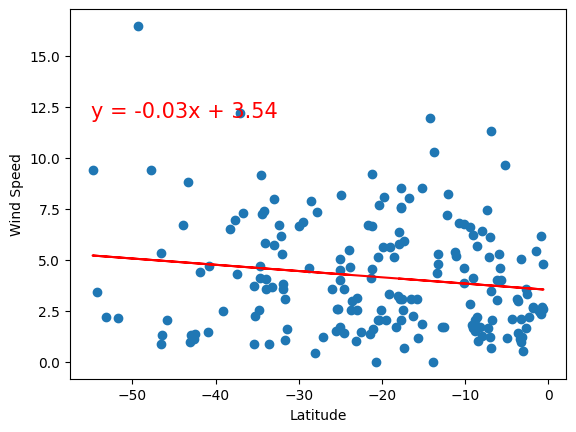

In [22]:
# Southern Hemisphere
linRegressPlot(southern_hemi_df.iloc[:,1],southern_hemi_df.iloc[:,6],"Latitude","Wind Speed",-55,12)

**Discussion about the linear relationship:** There is very little correlation between wind speed and latitude in either hemisphere according to our data. Once again, average windspeed would be a more valuable comparison.